## Default of Credit Card Clients

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
df = pd.read_csv('./output/DA_EXC/3-times_wrong_samples.csv',index_col=0)

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT_4,BILL_AMT_5,BILL_AMT_6,PAY_AMT_1,PAY_AMT_2,PAY_AMT_3,PAY_AMT_4,PAY_AMT_5,PAY_AMT_6,default
4451,4452,30000,2,1,2,25,0,0,0,0,...,16611,18179,19712,2000,2000,5611,2000,2000,1500,1
29942,29943,130000,1,3,1,45,-1,-1,-1,-1,...,2756,1585,1215,1826,2831,2756,1585,1215,2402,1
29657,29658,20000,1,2,1,44,0,0,0,0,...,19652,780,0,1400,1630,1000,0,0,0,1
13235,13236,50000,2,2,1,55,0,0,2,0,...,28181,28711,29368,3900,0,1300,1100,1100,1000,1
23526,23527,100000,2,1,1,49,1,2,0,0,...,95952,98744,97896,0,4700,4400,6000,2000,4000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16016,16017,140000,2,3,1,47,6,5,4,3,...,139701,90756,92935,0,0,0,0,3000,2000,0
14728,14729,110000,1,2,1,30,0,0,3,2,...,65413,66520,68270,9600,0,2600,2300,3000,5200,1
6539,6540,80000,2,1,2,28,0,0,2,2,...,80584,81693,78470,6800,0,6000,3000,0,5100,1
6528,6529,90000,2,5,2,23,0,0,0,0,...,42726,43802,42761,2000,2000,1502,1737,1500,5050,1


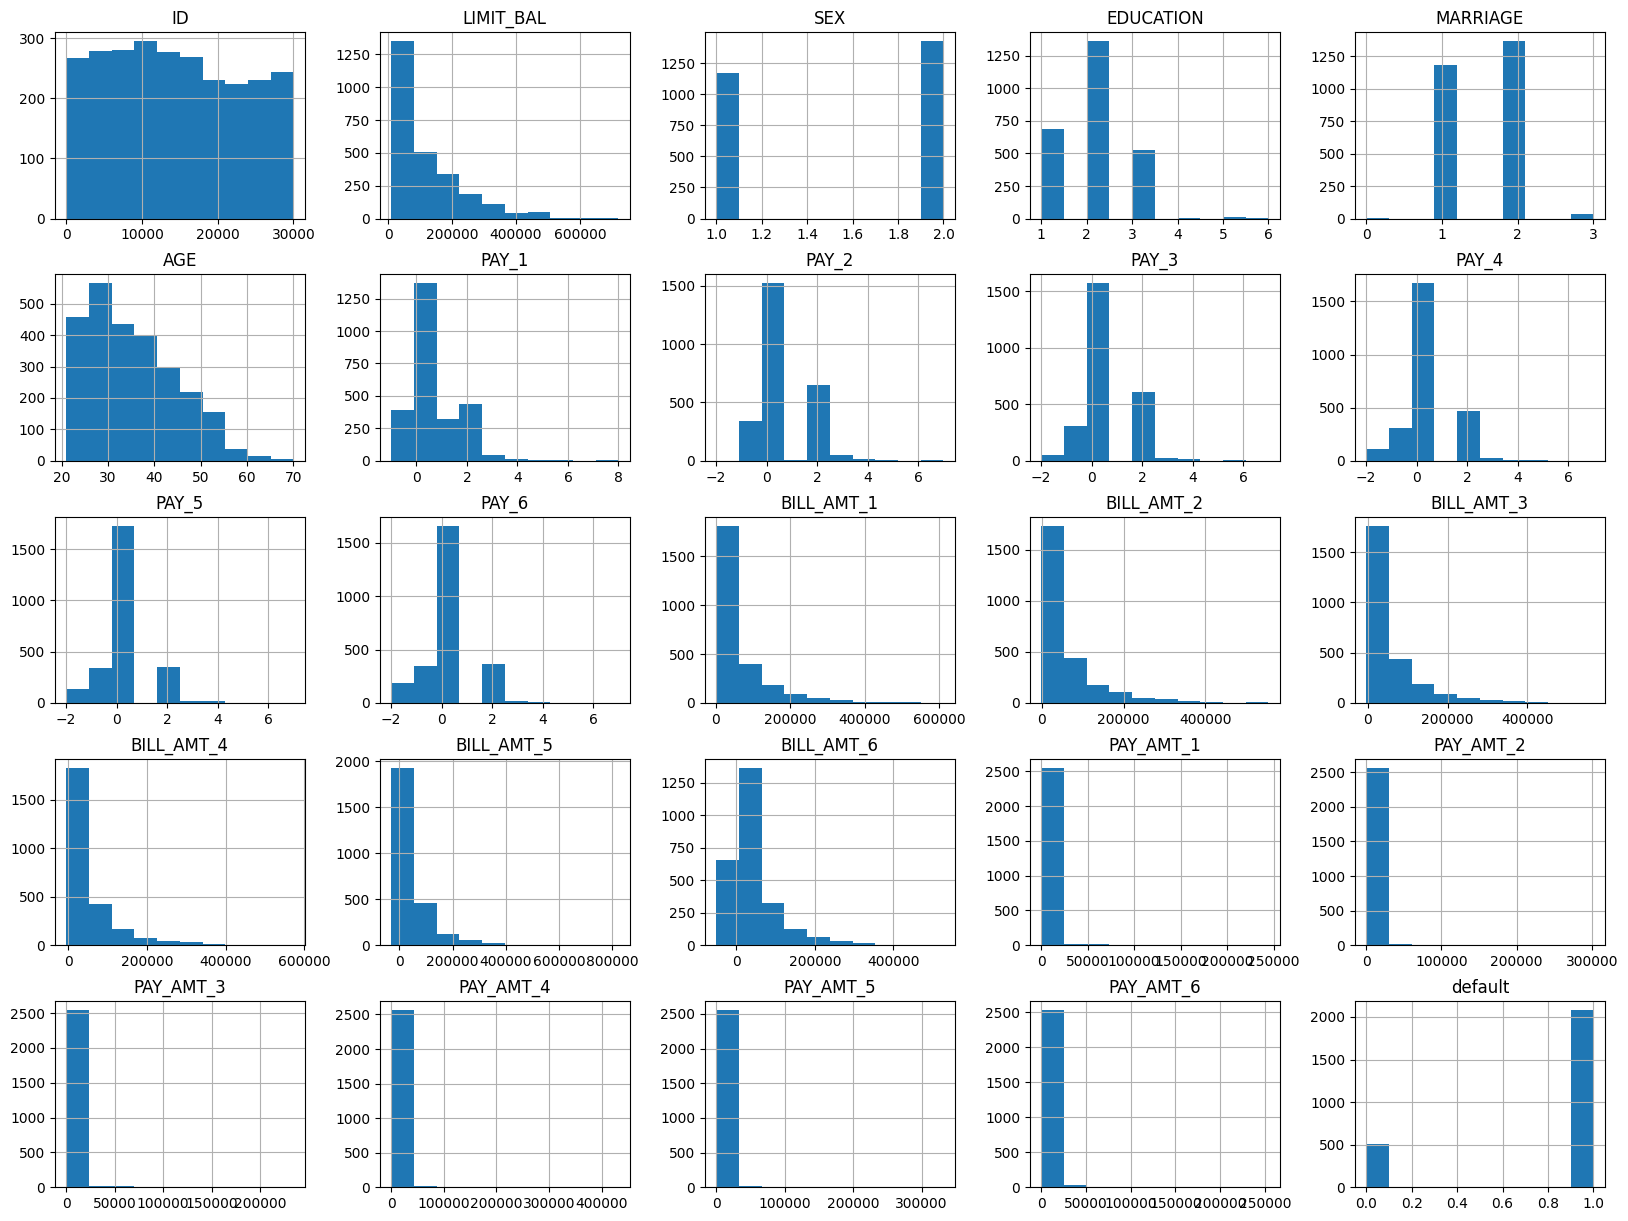

In [4]:
import matplotlib.pyplot as plt
df.hist(figsize= (20,15))
plt.show()

In [5]:
from mods_defaults import BasicTransformer
my_base_transformer = BasicTransformer('')

In [14]:
df_t = my_base_transformer.transform(df)
df_t = pd.concat([df_t,df.default],axis=1)

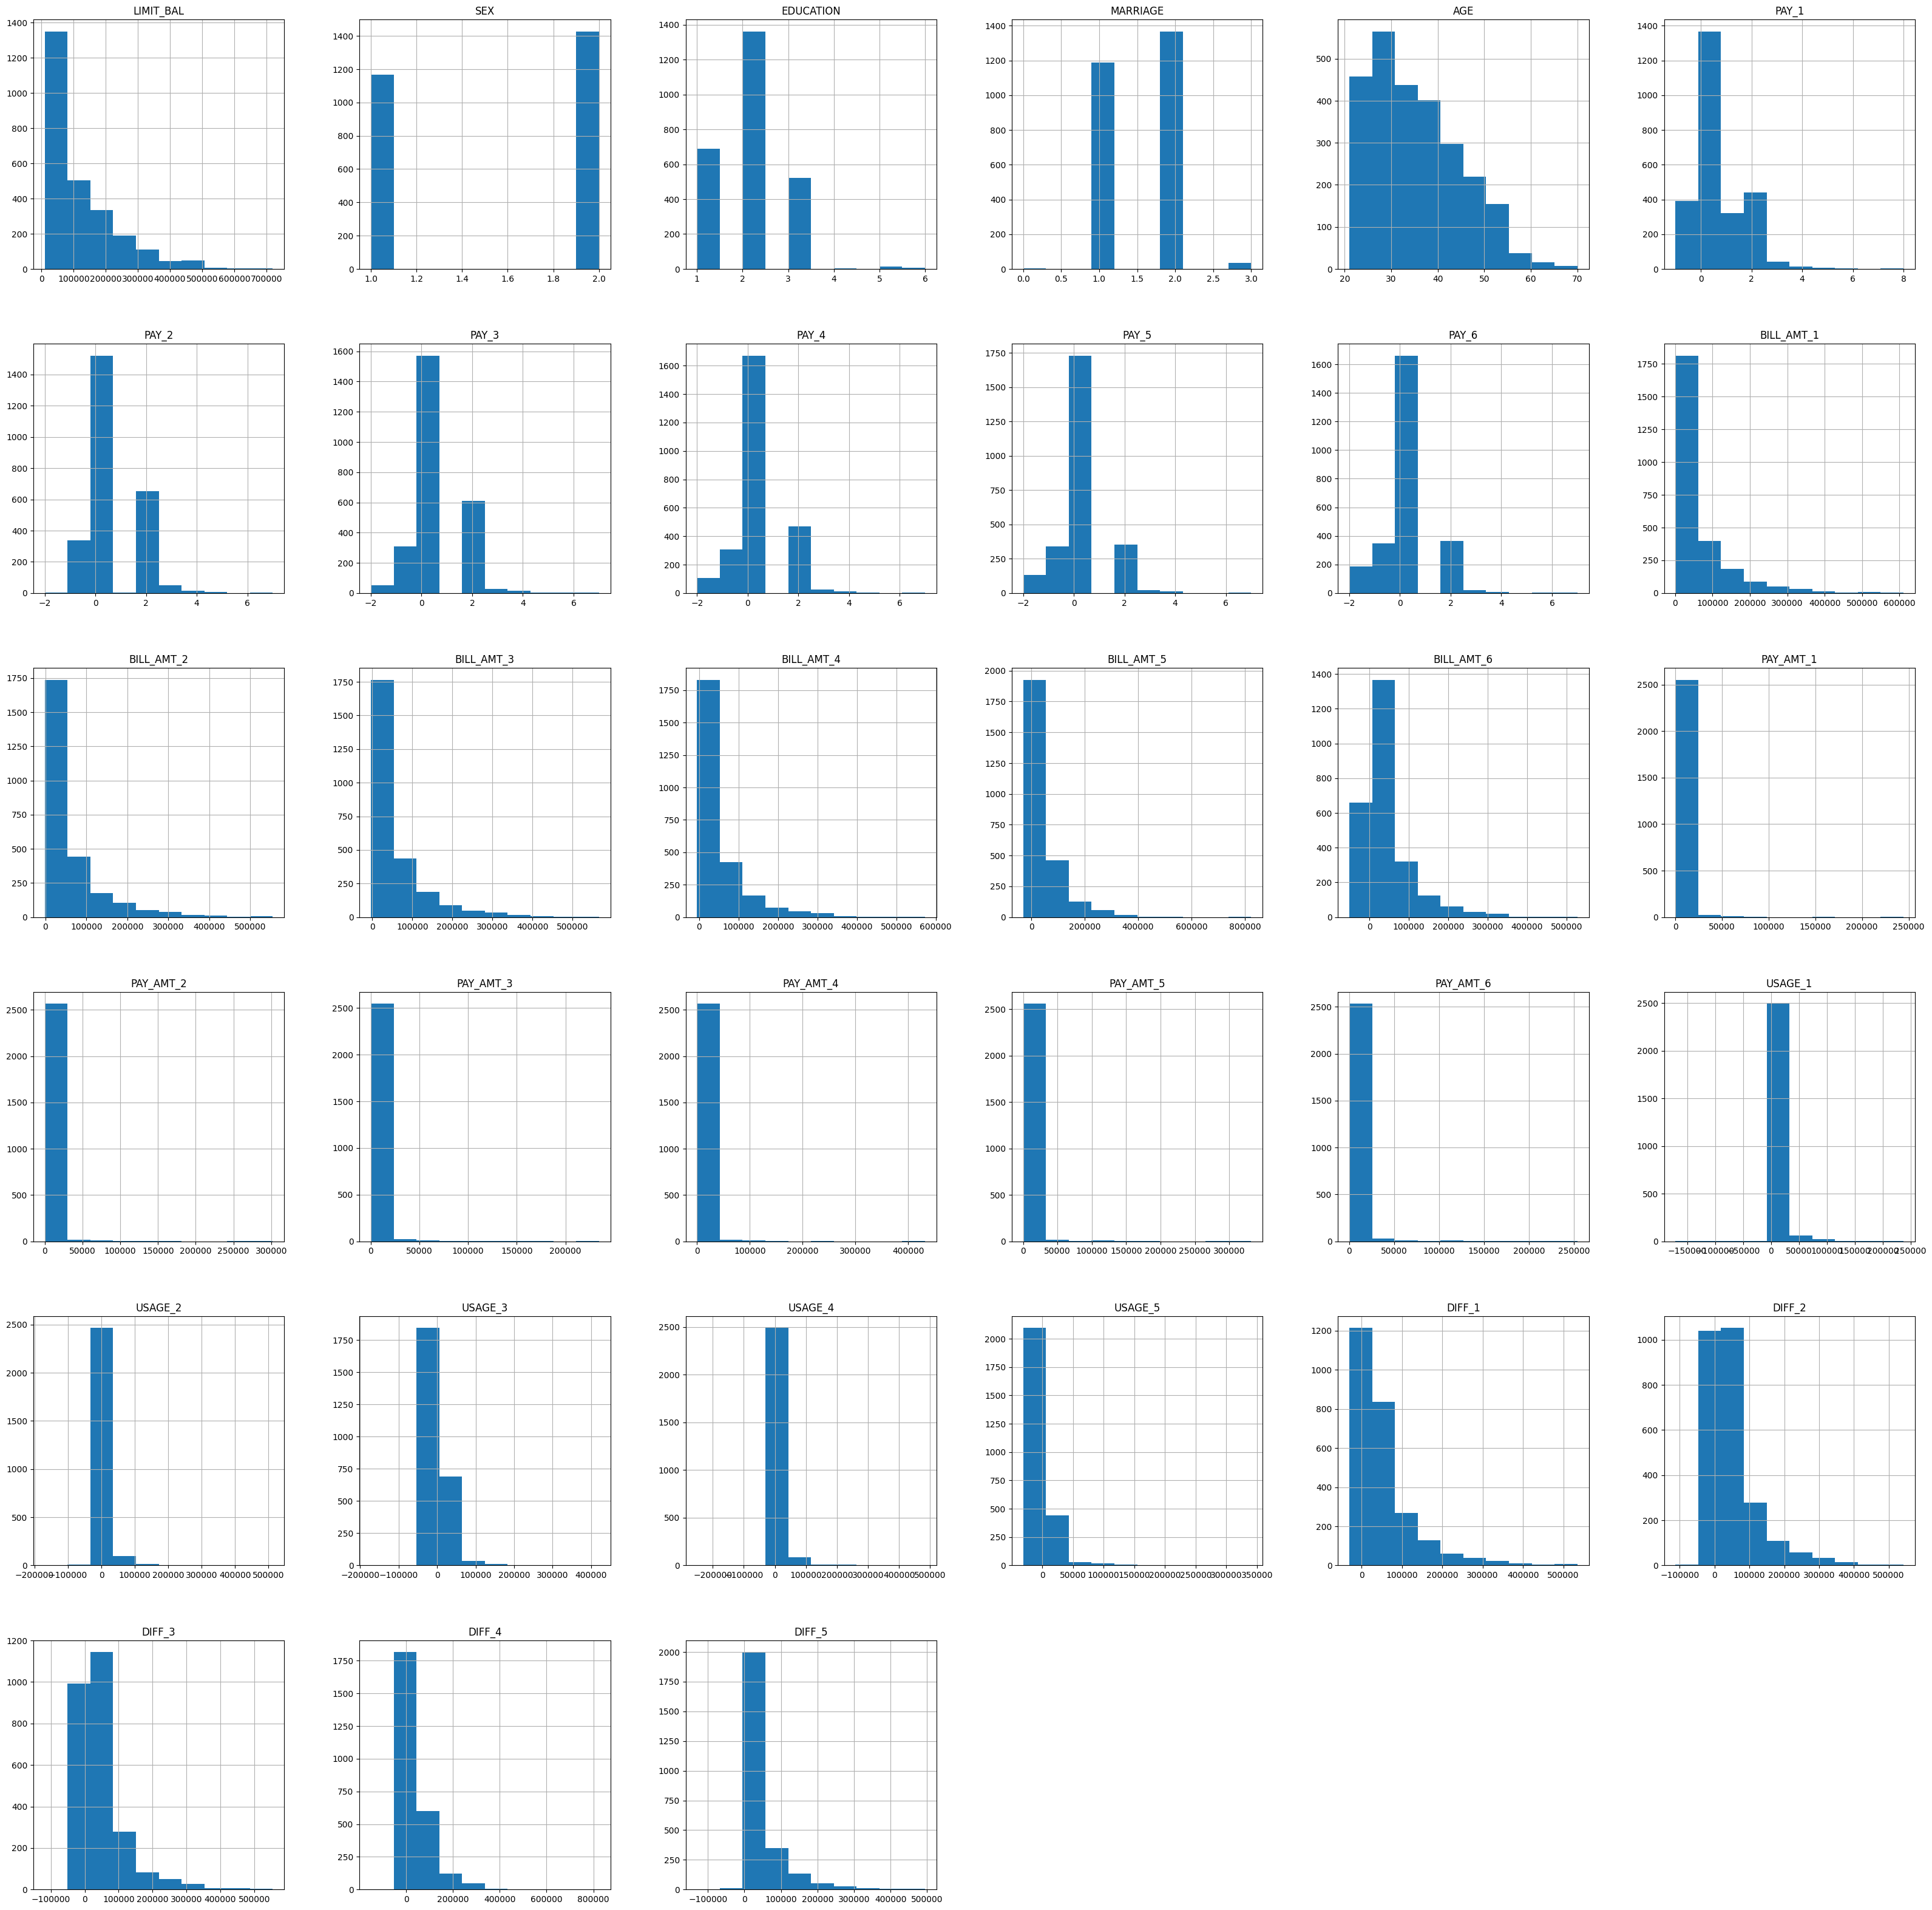

In [10]:
df_t.hist(figsize=(40,40))
plt.show()
plt.close()

In [20]:
df.shape

(2594, 25)

In [15]:
df_t.transpose()

,4451,29942,29657,13235,23526,1922,9543,29808,313,5977,...,3243,23235,16807,19189,15250,16016,14728,6539,6528,6445
LIMIT_BAL,30000,130000,20000,50000,100000,20000,240000,250000,200000,100000,...,30000,120000,110000,200000,30000,140000,110000,80000,90000,200000
SEX,2,1,1,2,2,1,2,1,2,2,...,2,2,1,2,2,2,1,2,2,2
EDUCATION,1,3,2,2,1,2,3,1,3,3,...,1,2,1,3,2,3,2,1,5,1
MARRIAGE,2,1,1,1,1,2,1,1,1,2,...,2,1,2,1,1,1,1,2,2,1
AGE,25,45,44,55,49,33,28,34,49,28,...,22,41,29,43,45,47,30,28,23,45
PAY_1,0,-1,0,0,1,0,0,0,-1,2,...,-1,0,0,1,2,6,0,0,0,-1
PAY_2,0,-1,0,0,2,0,0,0,2,0,...,-1,0,0,2,0,5,0,0,0,-1
PAY_3,0,-1,0,2,0,0,0,0,2,0,...,2,0,0,0,0,4,3,2,0,-1
PAY_4,0,-1,0,0,0,0,0,0,2,0,...,0,0,0,0,0,3,2,2,0,-1
PAY_5,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,0,-2


In [22]:
for i in range(10):
    print(df_t.iloc[:i*20].transpose())

Empty DataFrame
Columns: []
Index: [LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT_1, BILL_AMT_2, BILL_AMT_3, BILL_AMT_4, BILL_AMT_5, BILL_AMT_6, PAY_AMT_1, PAY_AMT_2, PAY_AMT_3, PAY_AMT_4, PAY_AMT_5, PAY_AMT_6, USAGE_1, USAGE_2, USAGE_3, USAGE_4, USAGE_5, DIFF_1, DIFF_2, DIFF_3, DIFF_4, DIFF_5, default]
            4451    29942  29657  13235   23526  1922    9543    29808  \
LIMIT_BAL   30000  130000  20000  50000  100000  20000  240000  250000   
SEX             2       1      1      2       2      1       2       1   
EDUCATION       1       3      2      2       1      2       3       1   
MARRIAGE        2       1      1      1       1      2       1       1   
AGE            25      45     44     55      49     33      28      34   
PAY_1           0      -1      0      0       1      0       0       0   
PAY_2           0      -1      0      0       2      0       0       0   
PAY_3           0      -1      0      2       0      0  

In [21]:
for i in range(10):
    print(df_t.loc[(df_t.DIFF_1>1500) &
                    (df_t.default!=1)].iloc[:i*20].transpose())

Empty DataFrame
Columns: []
Index: [LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT_1, BILL_AMT_2, BILL_AMT_3, BILL_AMT_4, BILL_AMT_5, BILL_AMT_6, PAY_AMT_1, PAY_AMT_2, PAY_AMT_3, PAY_AMT_4, PAY_AMT_5, PAY_AMT_6, USAGE_1, USAGE_2, USAGE_3, USAGE_4, USAGE_5, DIFF_1, DIFF_2, DIFF_3, DIFF_4, DIFF_5, default]
             5977   10212  6832   9676   14922  7705   8591   2255   12532  \
LIMIT_BAL   100000  50000  70000  60000  20000  60000  50000  30000  50000   
SEX              2      1      1      1      1      2      1      2      2   
EDUCATION        3      3      1      2      2      1      2      2      2   
MARRIAGE         2      1      2      2      2      2      2      2      1   
AGE             28     41     26     29     25     25     27     24     29   
PAY_1            2      2      2      2      2      2      2      2      2   
PAY_2            0      2      0      2      2      2      2      2      2   
PAY_3            0      

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT_4,BILL_AMT_5,BILL_AMT_6,PAY_AMT_1,PAY_AMT_2,PAY_AMT_3,PAY_AMT_4,PAY_AMT_5,PAY_AMT_6,default
count,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,...,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000
mean,14387.567849,121490.362375,1.550116,1.963763,1.552043,35.220894,0.424827,0.479183,0.387047,0.221280,...,51193.664996,46864.015806,45040.636469,4316.392830,4014.820740,3905.985736,3806.259059,4002.703547,4180.713184,0.803007
std,8527.872246,109765.648512,0.497578,0.746400,0.527484,9.569814,1.122954,1.154374,1.137213,1.089335,...,69146.600293,65125.914024,62740.512194,10895.020178,11368.492257,11701.292328,13082.575005,13951.238414,14356.380093,0.397804
min,14.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-1.000000,-2.000000,-2.000000,-2.000000,...,-5513.000000,-30481.000000,-51443.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7164.750000,50000.000000,1.000000,1.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,...,9514.250000,8196.750000,6219.750000,1159.500000,1092.500000,591.250000,450.500000,400.000000,300.250000,1.000000
50%,14011.000000,80000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,26998.500000,23574.000000,22164.000000,2004.500000,2000.000000,1618.000000,1479.000000,1500.000000,1457.000000,1.000000
75%,21431.750000,180000.000000,2.000000,2.000000,2.000000,42.000000,1.000000,2.000000,2.000000,0.000000,...,62692.750000,57078.750000,54789.000000,4400.000000,4022.000000,3549.500000,3500.000000,3500.000000,3500.000000,1.000000
max,30000.000000,720000.000000,2.000000,6.000000,3.000000,70.000000,8.000000,7.000000,7.000000,7.000000,...,572805.000000,823540.000000,527711.000000,244500.000000,302000.000000,234456.000000,432130.000000,332000.000000,254000.000000,1.000000


In [9]:
df.loc[df.PAY_1==-2].transpose()

""
ID
LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_1
PAY_2
PAY_3
PAY_4


In [1]:
from data_loader_exclude import load_data_default as load_data_exclude

In [2]:
load_data= load_data_exclude(exclude=True)

In [3]:
X = load_data.df_train

In [13]:
import pandas as pd

In [14]:
df = pd.concat(list(load_data.load_train_data()),axis=1)

In [15]:
df.loc[X.ID == 23516].transpose()

,23515
ID,23516
LIMIT_BAL,150000
SEX,2
EDUCATION,1
MARRIAGE,2
AGE,32
PAY_1,0
PAY_2,0
PAY_3,0
PAY_4,0


In [4]:
X.loc[25921]

KeyError: 25921

In [17]:
df_t.loc[df.PAY_1==-2].transpose()

,25921,23516,18550,9247,14766,18795,24542,12536,23390,14020,...,22505,15503,13796,1843,25726,14064,23293,23842,982,26121
LIMIT_BAL,30000,180000,150000,280000,150000,80000,220000,150000,430000,500000,...,310000,210000,390000,20000,160000,200000,100000,250000,500000,380000
SEX,2,2,2,1,2,2,1,2,2,2,...,2,1,1,1,2,1,2,2,1,2
EDUCATION,2,2,1,1,1,2,1,3,1,1,...,1,3,1,1,1,1,2,2,1,1
MARRIAGE,2,1,2,1,2,1,2,1,1,1,...,1,1,1,2,2,2,2,1,2,1
AGE,39,34,24,38,29,29,33,24,37,39,...,33,47,36,41,30,38,31,52,36,36
PAY_1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
PAY_2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-1
PAY_3,-2,-2,-2,-2,-2,-1,-2,-2,-2,-2,...,-2,-2,-2,0,-2,-2,-2,-2,-2,-1
PAY_4,-2,-2,-2,-2,-2,2,-2,-2,-2,-2,...,-2,-2,-2,0,-2,-2,-2,-2,-2,-1
PAY_5,-2,-2,-2,-2,-2,2,-2,-2,-2,-2,...,-2,-2,-1,0,-1,-2,-2,-2,-2,-1
